- main: make pkl and plt
- outlier: get outlier image with bb
- sample: get some example obstacles

In [1]:
cd /home/dai/Documents/GitHub/scripts/scripts_for_ground_truth_labels

/home/dai/Documents/GitHub/scripts/scripts_for_ground_truth_labels


In [63]:
%run result_explore.py main

DEBUG Start explore ['noidea2']...
DEBUG info_list.pkl saved.
INFO car: 1210055
INFO carignore: 702550
INFO truck: 123737
INFO van: 204744
INFO bus: 104435
INFO motorcyclist: 38190
INFO pedestrian: 190810
INFO trafficcone: 178965
INFO othersignore: 15993
INFO pedestrianignore: 50214
INFO noidea2: 252
INFO noidea1: 3220
INFO tricyclelist: 11006
INFO cyclist: 22828
INFO confused: 36
INFO barrowlist: 652
DEBUG making center.pkl...
DEBUG total = 252
DEBUG valid = 252
DEBUG center.pkl saved.
/home/dai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
DEBUG making cover.pkl...
DEBUG cover.pkl saved.
DEBUG making palace_dict.pkl...
DEBUG palace_dict.pkl saved.
DEBUG palace_ratio.

In [64]:
%run result_explore.py outlier 'ratio'

DEBUG opening info_list.pkl of ['noidea2']...
INFO count: 0
DEBUG Done.


In [65]:
%run result_explore.py outlier 'range'

DEBUG opening info_list.pkl of ['noidea2']...
INFO count: 0
DEBUG Done.


In [68]:
%run result_explore.py sample 10

DEBUG opening info_list.pkl...
DEBUG Done.


In [69]:
%run result_explore.py count

DEBUG opening info_list.pkl of ['noidea2']...
INFO count_all:
INFO car : 1210055
INFO truck : 123737
INFO van : 204744
INFO bus : 104435
INFO pedestrian : 190810
INFO cyclist : 22828
INFO tricyclelist : 11006
INFO motorcyclist : 38190
INFO barrowlist : 652
INFO pedestrianignore : 50214
INFO carignore : 702550
INFO othersignore : 15993
INFO trafficcone : 178965
INFO confused : 36
INFO noidea1 : 3220
INFO noidea2 : 252
INFO count_tru:
INFO car : 133469
INFO truck : 13772
INFO van : 19636
INFO bus : 13789
INFO pedestrian : 3077
INFO cyclist : 906
INFO tricyclelist : 579
INFO motorcyclist : 1615
INFO barrowlist : 16
INFO pedestrianignore : 1
INFO carignore : 7
INFO othersignore : 0
INFO trafficcone : 8672
INFO confused : 3
INFO noidea1 : 140
INFO noidea2 : 12
INFO count_occ:
INFO car : 793927
INFO truck : 98491
INFO van : 148952
INFO bus : 91245
INFO pedestrian : 149231
INFO cyclist : 11387
INFO tricyclelist : 7759
INFO motorcyclist : 20011
INFO barrowlist : 461
INFO pedestrianignore : 12


- use tomcat to show result

In [ ]:
cd /home/dai/Documents/image_viewer-master/tomcat/webapps/view_images

In [ ]:
%run sh setup.sh /media/dai/ed9cf21d-a757-4514-b33a-34472199d3b2/daiguozheng_files/20180703/result_

- visit: http://172.23.232.190:8080/view_images/html/0.html

In [82]:
import matplotlib.pyplot as plt
import pickle
import json
# 障碍物类型
LABEL_MAP = {
     1:    'car',
     2:    'truck',
     3:    'van',
     4:    'bus',
     5:    'pedestrian',
     6:    'cyclist',
     7:    'tricyclelist',
     8:    'motorcyclist',
    12:    'barrowlist',
    13:    'pedestrianignore',
    14:    'carignore',
    15:    'othersignore',
    16:    'trafficcone',
    17:    'confused',
    18:    'noidea1',
    19:    'noidea2'
}

ob_list = [LABEL_MAP[key] for key in LABEL_MAP]
data_root = '/media/dai/ed9cf21d-a757-4514-b33a-34472199d3b2/daiguozheng_files/20180703'

if len(ob_list) == 1:
    suffix = ob_list[0]
else:
    suffix = 'all'
    
dirres = os.path.join(data_root+'/result_'+suffix)
dirpkl   = os.path.join(dirres, 'data_pkl')

myfigsize = (20,15)
mydpi = 72


def count():
    logging.debug("opening info_list.pkl of " + str(ob_list) + "...")

    if os.path.exists(os.path.join(dirpkl, 'info_list.pkl')) == 0:
        logging.error("No info_list.pkl.")

    with open(os.path.join(dirpkl, 'info_list.pkl'), 'rb') as fr:
        info_list = pickle.load(fr)

    count_occ = {}
    count_tru = {}
    count_all = {}
    for ob in [LABEL_MAP[key] for key in LABEL_MAP]:
        count_occ[ob] = 0
        count_tru[ob] = 0
        count_all[ob] = 0

    # 根据判断条件输出异常图片
    for info in info_list:
        label = json.loads(info[3])
        result = label['result']
        # video_name: MKZ078_23_1522650020_1522650320.bag
        video_name = label['videoName']
        # frame_id: 4170
        frame_id = label['frameId']
        # jpg_name: MKZ078_23_1522650020_1522650320_4170
        # jpg_name = video_name.split('.')[0] + '_' + str(frame_id))
        for res in result:
            ob = LABEL_MAP[res['tag']]
            count_all[ob] = count_all[ob] + 1
            if res['istruncated'] == 1:
                count_tru[ob] = count_tru[ob] + 1
            if res['isoccluded'] > 0:
                count_occ[ob] = count_occ[ob] + 1

#     logging.info("count_all:")
#     for ob in count_all:
#         logging.info(str(ob) + " : " + str(count_all[ob]))
#     logging.info("count_tru:")
#     for ob in count_tru:
#         logging.info(str(ob) + " : " + str(count_tru[ob]))
#     logging.info("count_occ:")
#     for ob in count_occ:
#         logging.info(str(ob) + " : " + str(count_occ[ob]))
    return count_all, count_tru, count_occ

In [83]:
count_all, count_tru, count_occ = count()

DEBUG opening info_list.pkl of ['car', 'truck', 'van', 'bus', 'pedestrian', 'cyclist', 'tricyclelist', 'motorcyclist', 'barrowlist', 'pedestrianignore', 'carignore', 'othersignore', 'trafficcone', 'confused', 'noidea1', 'noidea2']...


DEBUG backend module://ipykernel.pylab.backend_inline version unknown


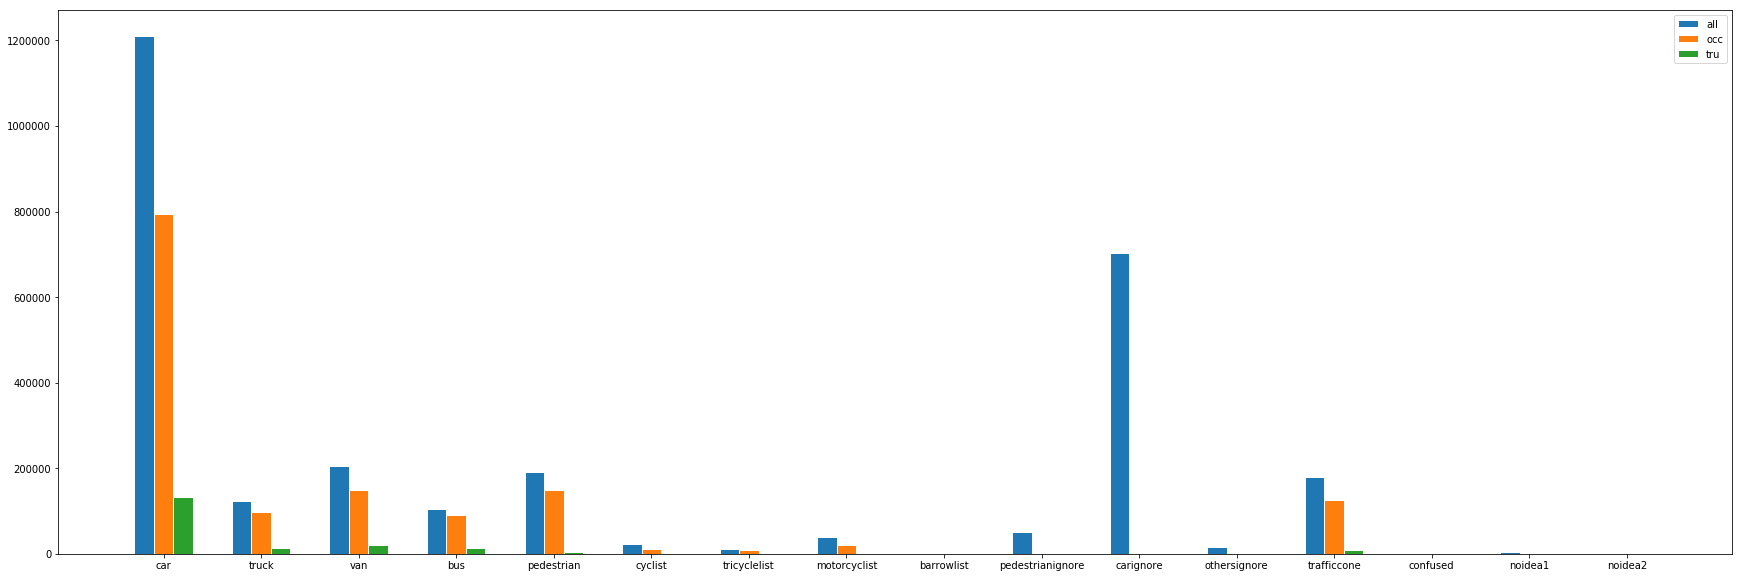

In [122]:
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
plt.figure(figsize=(30,10), dpi=mydpi)
bar_width = 0.2

index = [i+1 for i in list(range(len(count_all)))]

plt.bar(index, list(count_all.values()),
        width = bar_width, edgecolor = 'white', label='all')
plt.bar([i+bar_width for i in index], list(count_occ.values()),
        width = bar_width, edgecolor = 'white', label='occ')
plt.bar([i+bar_width*2 for i in index], list(count_tru.values()),
        width = bar_width, edgecolor = 'white', label='tru')

plt.xticks([i+bar_width for i in index], list(count_all.keys()))
plt.legend(loc='upper right')
plt.show()

In [34]:
import matplotlib.pyplot as plt
import pickle
import json
import os
import numpy as np
# 障碍物类型
LABEL_MAP = {
     1:    'car',
     2:    'truck',
     3:    'van',
     4:    'bus',
     5:    'pedestrian',
     6:    'cyclist',
     7:    'tricyclelist',
     8:    'motorcyclist',
    12:    'barrowlist',
    13:    'pedestrianignore',
    14:    'carignore',
    15:    'othersignore',
    16:    'trafficcone',
    17:    'confused',
    18:    'noidea1',
    19:    'noidea2'
}

ob_list = ['pedestrian']
# ob_list = [LABEL_MAP[key] for key in LABEL_MAP]
data_root = '/media/dai/ed9cf21d-a757-4514-b33a-34472199d3b2/daiguozheng_files/20180703'

if len(ob_list) == 1:
    suffix = ob_list[0]
else:
    suffix = 'all'
    
dirres = os.path.join(data_root+'/result_'+suffix)
dirpkl   = os.path.join(dirres, 'data_pkl')
dirplt = os.path.join(dirres, 'data_plt')

myfigsize = (20,15)
mydpi = 72

In [45]:
def plot_distribution():
    #logging.debug("opening info_list.pkl of " + str(ob_list) + "...")

    if os.path.exists(os.path.join(dirpkl, 'info_list.pkl')) == 0:
        pass
        #logging.error("No info_list.pkl.")

    with open(os.path.join(dirpkl, 'info_list.pkl'), 'rb') as fr:
        info_list = pickle.load(fr)
        
    obstacle_dict = {}
    for ob in [LABEL_MAP[key] for key in LABEL_MAP]:
        obstacle_dict[ob] = []
        
    for info in info_list:
        label = json.loads(info[3])
        result = label['result']
        # video_name: MKZ078_23_1522650020_1522650320.bag
        video_name = label['videoName']
        # frame_id: 4170
        frame_id = label['frameId']
        # jpg_name: MKZ078_23_1522650020_1522650320_4170
        # jpg_name = video_name.split('.')[0] + '_' + str(frame_id))
        for res in result:
            ob = LABEL_MAP[res['tag']]               
            h = res['h']
            w = res['w']
            obstacle_dict[ob].append([video_name, frame_id, res])
    
    print("Done.")
    
    return obstacle_dict

In [46]:
obstacle_dict = plot_distribution()

Done.


In [83]:
def plot_obstacle(obstacle_dict, ob_list):
    for ob in ob_list:

        obstacle_ratio = [info[2]['h'] / info[2]['w'] for info in obstacle_dict[ob]]
        obstacle_height = [info[2]['h'] for info in obstacle_dict[ob]]
        obstacle_width = [info[2]['w'] for info in obstacle_dict[ob]]
        
        obstacle_ratio_np = np.array(obstacle_ratio)
        obstacle_height_np = np.array(obstacle_height)
        obstacle_width_np = np.array(obstacle_width)
        
        plt.figure(figsize=myfigsize, dpi=mydpi)
        n_bin = 200
        
        plt.subplot(3,1,1)
        plt.title(str(ob_list) + ' ratio range in '+ str(round(obstacle_ratio_np.min(),2)) +
                  '~' + str(round(obstacle_ratio_np.max(),2)))
        #upper_r = 6
        upper_r = round(obstacle_ratio_np.max(),2) / 2
        gap_r = upper_r / n_bin
        bins = list(np.arange(0, upper_r, gap_r))
        plt.hist(obstacle_ratio_np, bins)

        plt.subplot(3,1,2)
        plt.title(str(ob_list) + ' height range in '+ str(round(obstacle_height_np.min(),2)) +
                  '~' + str(round(obstacle_height_np.max(),2)))
        #upper_h = 400
        upper_h = round(obstacle_height_np.max(),2) / 2
        gap_h = upper_h / n_bin
        bins = list(np.arange(0, upper_h, gap_h))
        plt.hist(obstacle_height_np, bins)
        
        plt.subplot(3,1,3)
        plt.title(str(ob_list) + ' width range in '+ str(round(obstacle_width_np.min(),2)) +
                  '~' + str(round(obstacle_width_np.max(),2)))
        #upper_w = 250
        upper_w = round(obstacle_width_np.max(),2) / 2
        gap_w = upper_w / n_bin
        bins = list(np.arange(0, upper_h, gap_w))
        plt.hist(obstacle_width_np, bins)

        

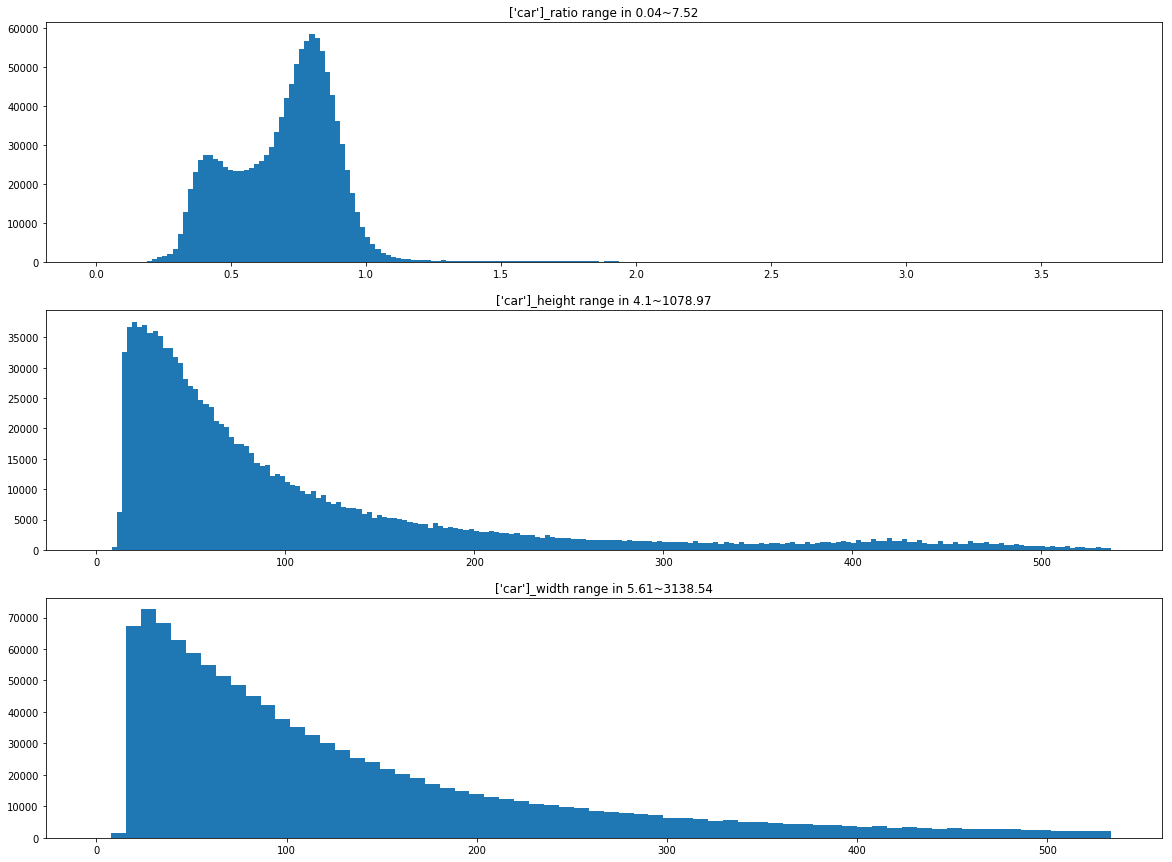

In [80]:
plot_obstacle(obstacle_dict, ['car'])

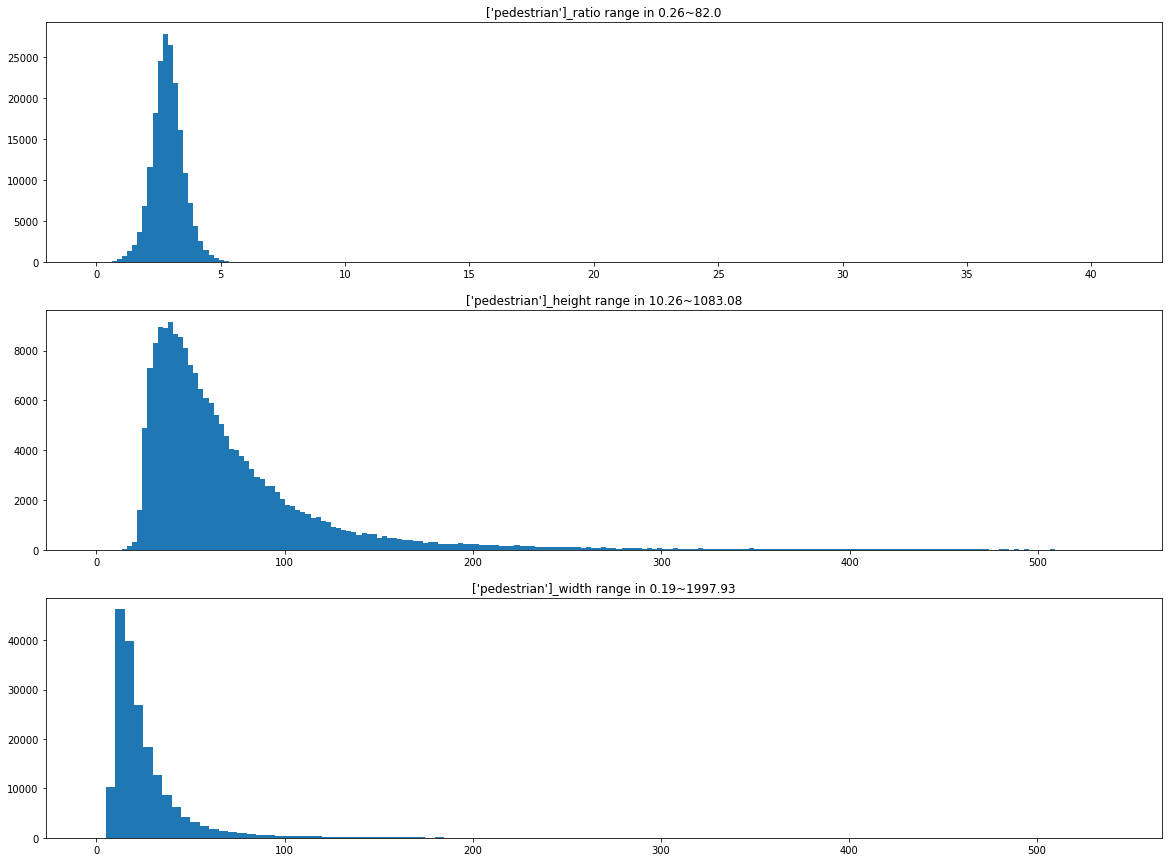

In [81]:
plot_obstacle(obstacle_dict, ['pedestrian'])

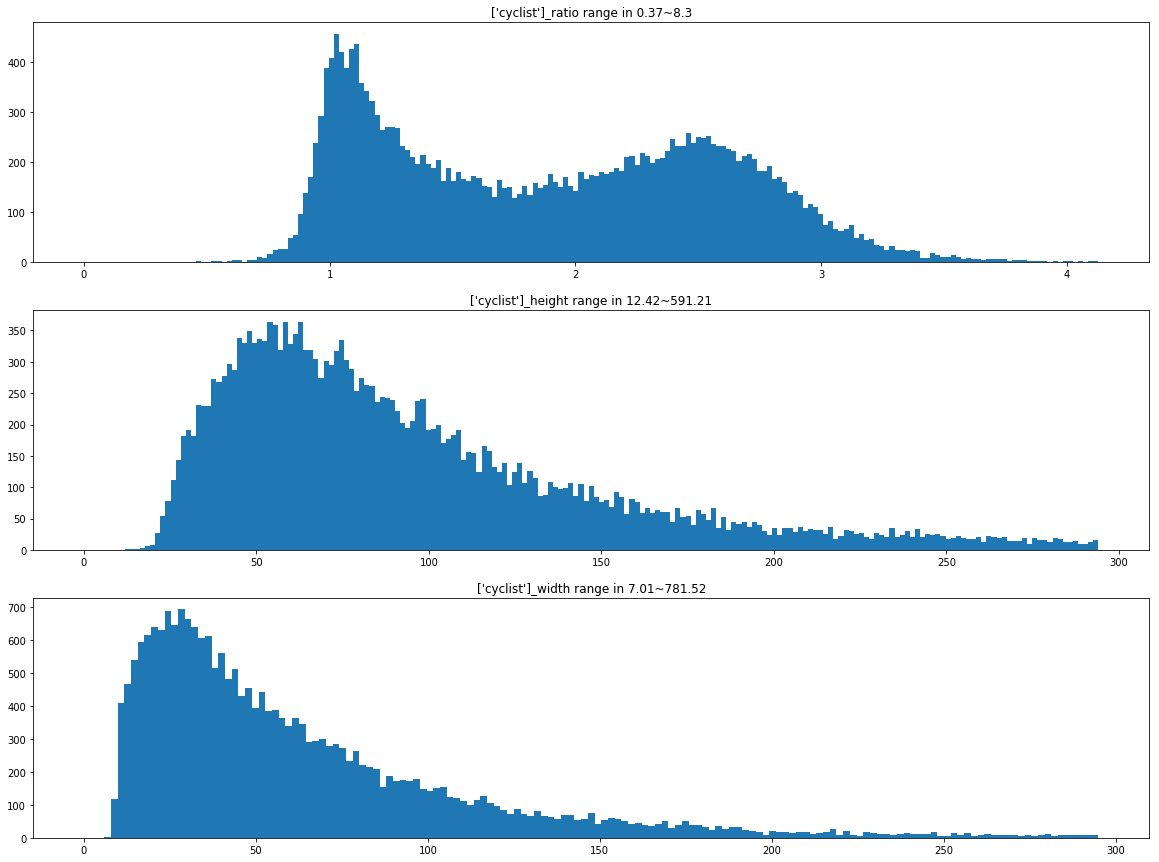

In [82]:
plot_obstacle(obstacle_dict, ['cyclist'])